The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.


## 1. Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 

In [1]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

In [3]:
# Solve here...
data.head(2)


,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0


Description of each variable for better understanding later on:

- **id**: id of each applicant
- **grade**: loan grade (categoric, ordinal)
- **annual_inc**: The annual income provided by the borrower during registration. (numeric)
- **short_emp**: 1 when the borrower is employed for 1 year or less. (binary)
- **emp_length_num**: Employment length in years. It ranges between 0 and 10, where 0 means less than one year and 10 means ten or more years. (numeric)
- **home_ownership**: Type of home ownership. (categoric)
- **dti**: Debt-To-Income Ratio (numeric, ordinal)
- **purpose**: category for the loan request. (categoric)
- **term**: number of payments on the loan. (numeric)
- **last_delinq_none**: 1 when the borrower had at least one event of delinquency (past due a debt). (binary)
- **last_major_derog_none**: 1 when the borrower had at least 90 days of a bad rating. (binary)
- **revol_util**: revolving line utilization rate or the amount of credit the borrower uses relative to all available revolving credit. (numeric)
- **total_rec_late_fee**: late fees received to date. (numeric, ordinal)
- **od_ratio**: overdraft ratio (not enough cash to cover a transaction or withdrawal). (numeric, ordinal)
- **bad_loan**: 1 when a loan was not paid. (binary)


In [4]:
data.bad_loan.value_counts()

bad_loan
0    16000
1     4000
Name: count, dtype: int64

In [5]:
data.bad_loan.value_counts(normalize = True)

bad_loan
0    0.8
1    0.2
Name: proportion, dtype: float64

The dataset represents a supervised classification problem, where the objective is to predict whether a loan applicant will default or not based on their characteristics. The target variable, "bad_loan," with values 0 and 1, indicates the binary classification nature of the task. We also have an imbalanced class distribution of the target variable - 20% of records belong to applicants with bad loans.








## 2. Data Visualization

**2.1 dti"(debt-to income) vs. "annual_inc"(annual income)**

Let's create a scatter plot with features "dti"(debt-to income) vs. "annual_inc"(annual income):

In [6]:
data.annual_inc.max()

1000000.0

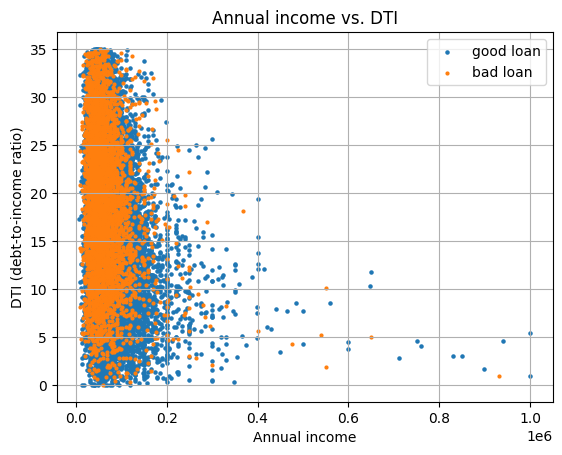

In [7]:
plt.scatter(
    x=data[data["bad_loan"] == 0]['annual_inc'], 
    y=data[data["bad_loan"] == 0]['dti'], 
    s = 5,
    label="good loan"
)

plt.scatter(
    x=data[data["bad_loan"] == 1]['annual_inc'], 
    y=data[data["bad_loan"] == 1]['dti'], 
    s = 4,
    label="bad loan"
)

plt.legend()
plt.xlabel('Annual income')
plt.ylabel('DTI (debt-to-income ratio)')
plt.title('Annual income vs. DTI')
plt.grid()
plt.show()

The scatter plot reveals that for individuals with lower annual incomes (0-100k range), there's a high concentration of bad loans associated with high debt-to-income ratios (DTI). However, as annual income increases, there's a significant decrease in bad loans and DTI, indicating a trend where higher incomes are correlated with lower default rates and reduced debt burden relative to income.
We can also observe that the majority of loans in the dataset are concentrated within the range of annual incomes below 200k. 

**2.1 "Grade" frequency distribution:**

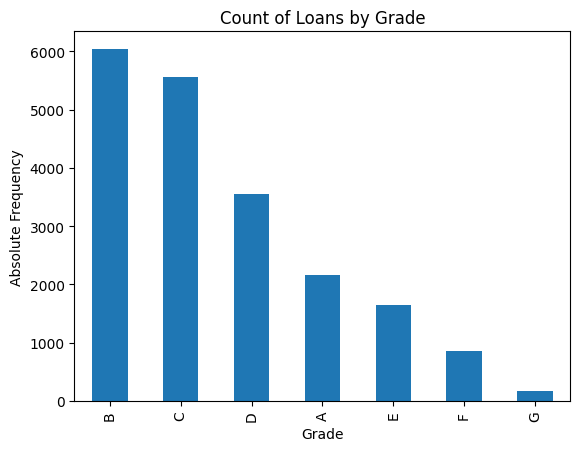

In [8]:
data["grade"].value_counts().plot.bar()

plt.xlabel('Grade')
plt.ylabel('Absolute Frequency')
plt.title('Count of Loans by Grade')
plt.show()


**"Grade" frequency distribution by target:**

In [9]:
grade_order = data['grade'].value_counts().index
grade_order 

Index(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype='object', name='grade')

Text(0.5, 1.0, 'Count of Loans by Grade')

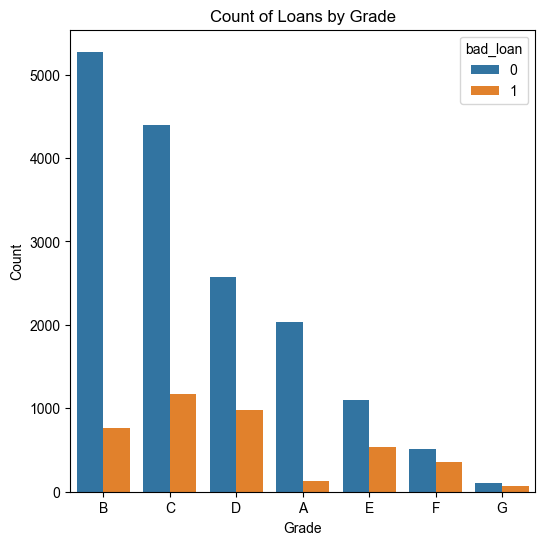

In [10]:
import seaborn as sns

plt.figure(figsize = (6,6))
sns.countplot(x = 'grade', hue = 'bad_loan', data = data, order = grade_order)

sns.set(style='whitegrid')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Count of Loans by Grade')

As we can see in the figure above, as loan grade increases, the chances of default also increase. It means that the probability of loan defaults is higher in loan grades - D, E, F, G (indicating that this feature is ordinal).

Grade distribution of loans:

- Grade B: High frequency suggests a substantial portion of borrowers with relatively good creditworthiness. These borrowers may have strong credit profiles, making them eligible for loans with favorable terms and lower interest rates.
- Grade C and D loans may indicate borrowers with somewhat weaker credit profiles, potentially with higher debt levels or less stable financial backgrounds.
- Grade A: The lower frequency of Grade A loans may be attributed to several factors. Firstly, Grade A loans are typically reserved for borrowers with excellent credit profiles, such as those with high credit scores, stable incomes, and low debt levels. Consequently, there may be fewer borrowers who meet the stringent criteria for Grade A loans, leading to a lower frequency in the loan portfolio.
- Grades E, F, and G: These grades represent progressively higher credit risk categories, with Grade G indicating the highest level of risk. The lower frequencies of these grades suggest that there are fewer borrowers with poor credit profiles in the loan portfolio. Borrowers in these categories may exhibit significant credit weaknesses, such as low credit scores, unstable incomes, or high levels of debt, making them less eligible for loans or subject to higher interest rates and stricter lending criteria.


**2.3. Correlation Heatmap**

Creating a mask for numerical features only (to be used in correlation):

In [11]:
numeric_mask = data.select_dtypes(include = 'number').columns #creating a mask for numeric values only, as categorical variables don't have a linear relationship like numerical do (an alternative would be to encode the categorical variables).
numeric_features = data[numeric_mask]
numeric_features.corr()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


<Axes: >

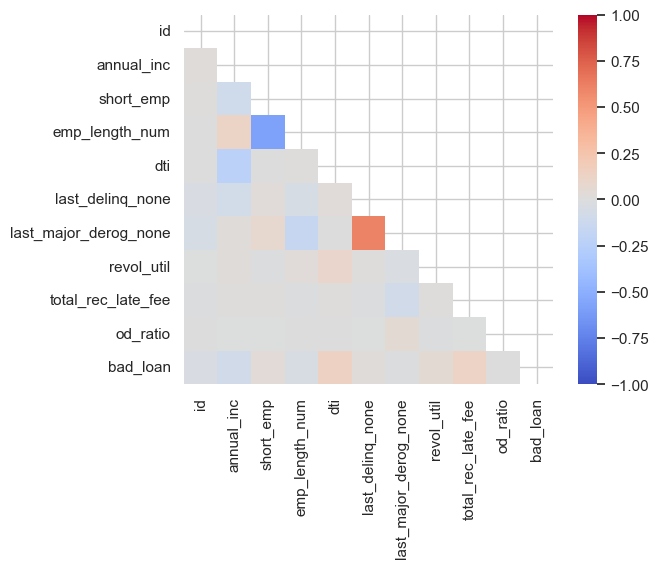

In [12]:
import seaborn as sns
corr = numeric_features.corr()

sns.heatmap(
    corr,
    vmin = -1., #set the range of the colormap from -1 (dark blue, indicating negative correlation) to 1 (dark red, indicating positive correlation)
    vmax = 1.,
    cmap = 'coolwarm',
    square = True, # the heatmap is square-shaped.
    mask=np.triu(corr.notnull()), # masks the upper triangle of the heatmap, setting it to be transparent. 
)

Several correlations are evident in the heatmap, with some variables displaying strong correlations e.g. last_major_derog_none with last_deliq_none, while others exhibit more moderate associations, e.g. emp_length_num and annual_inc. These findings suggest potential relationships within the data that may indicate further analysis to better understand patterns and dependencies.

**2.4."dti" (debt-to-income) distribution:**

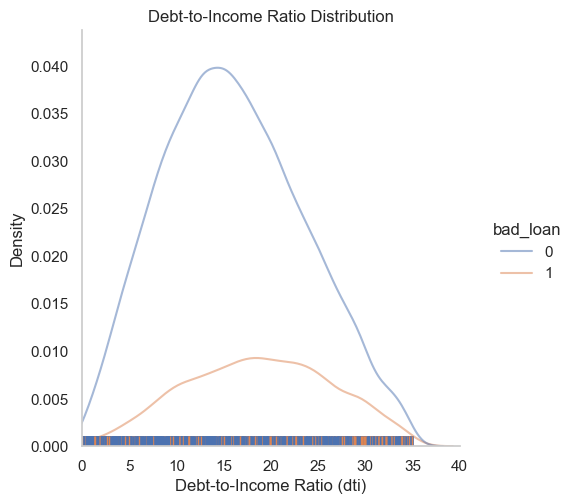

In [13]:
import seaborn as sns


unpivot = data.melt(value_vars=["dti"], id_vars=["bad_loan"])

sns.displot(
    unpivot, 
    x="value", 
    kind="kde", 
    rug=True, 
    hue="bad_loan",
    alpha = 0.5,
    facet_kws=dict(xlim=(0, 40)),
)


plt.xlabel('Debt-to-Income Ratio (dti)')
plt.title('Debt-to-Income Ratio Distribution')
plt.grid()
plt.show()

In [14]:
data.dti.max()

34.99

The observed differences in the shape of the density plots for debt-to-income ratio (DTI) between good and bad loans reveal distinct distributional characteristics associated with each loan outcome. The sharper, triangular shape of the density plot for good loans indicates a higher concentration of observations around a specific DTI range (around 15), reflecting less variability among borrowers with successful loan outcomes. Conversely, the wider shape and lower kurtosis of the density plot for bad loans suggest greater variability in DTI among borrowers who default on their loans, with a broader range of DTI values and less clustering around a specific value - indicating that lenders are less likely to extend loans to individuals with excessively higher distribution of DTI ratios. These differences highlight the importance of DTI as a predictive factor for loan outcomes, with borrowers' levels of debt relative to their income influencing their likelihood of loan default.

**2.5. Distribution of "term" duration with respect to target**

Text(0.5, 1.0, 'Term duration by target')

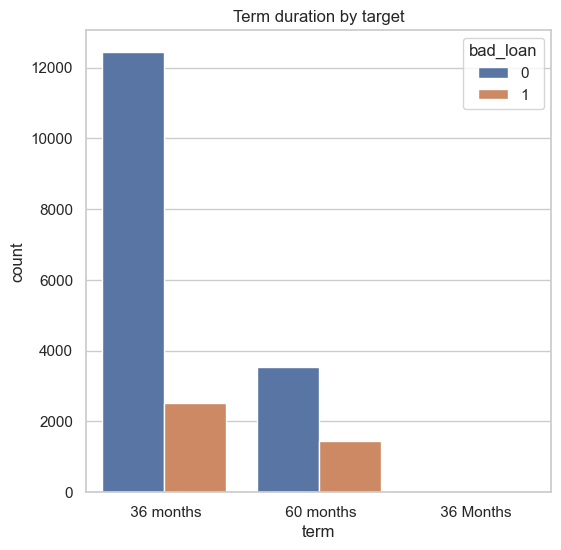

In [15]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'term', hue = 'bad_loan', data = data)
plt.title('Term duration by target')

The plot highlights a discrepancy in the distribution of loan terms, with a significantly higher number of loans featuring a 36-month term compared to the 60-month term. The proportion of bad loans within the 60-month term category appears to be equivalent to that of the 36-month term. This suggests that while 36-month loans may be more prevalent, they are less risky than their 60-month counterparts. There's a possibility that 60-month loans may carry higher risk factors or require closer analysis in risk assessment processes.

There is also a typo in the feature - you can see both categories - 36 months and 36 Months, both are the same. This will be evaluated later.

**2.5. Annual income ("annual_inc") boxplot:**

In [16]:
data_temp = data.copy()

data_temp["target"] = data_temp["bad_loan"].map( {0:'Good Loan' , 1:'Bad Loan'} )

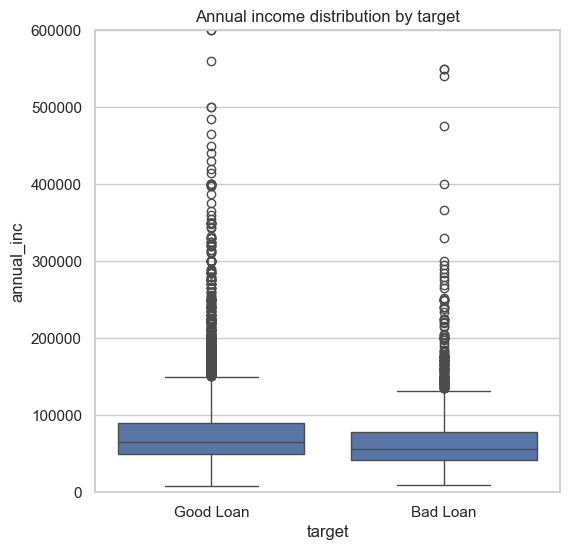

In [17]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "target",
    y = "annual_inc",
    data = data_temp, 
)
plt.gca().set_ylim(0, 600000)
plt.title("Annual income distribution by target")
plt.show()

The wider and higher spread of annual income among applicants with good loans implies a potential association between lower incomes and the prevalence of bad loans. Additionally, the presence of outliers, particularly those exceeding approximately $150,000 in income, will be evaluated later on.

**2.6. "Purpose" bar plot:**

In [18]:
grouped_data = data.groupby(['purpose', 'bad_loan']).size().unstack(fill_value=0)
grouped_data

bad_loan,0,1
purpose,,
car,138,30
credit_card,3435,702
debt_consolidation,9855,2482
home_improvement,887,209
house,86,15
major_purchase,293,86
medical,136,39
moving,93,30
other,747,274


In [19]:
grouped_data["total"] = grouped_data[0] + grouped_data[1]
grouped_data["total"]

purpose
car                     168
credit_card            4137
debt_consolidation    12337
home_improvement       1096
house                   101
major_purchase          379
medical                 175
moving                  123
other                  1021
small_business          265
vacation                112
wedding                  86
Name: total, dtype: int64

In [20]:
grouped_data_sorted = grouped_data.sort_values(by = 'total', ascending = False)
grouped_data_sorted

bad_loan,0,1,total
purpose,,,
debt_consolidation,9855,2482,12337
credit_card,3435,702,4137
home_improvement,887,209,1096
other,747,274,1021
major_purchase,293,86,379
small_business,177,88,265
medical,136,39,175
car,138,30,168
moving,93,30,123


<Figure size 1000x600 with 0 Axes>

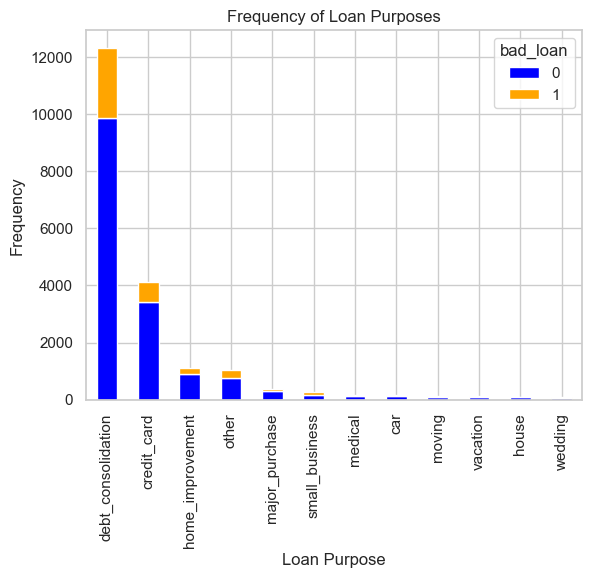

In [21]:

plt.figure(figsize=(10, 6))
grouped_data_sorted.drop(columns = 'total').plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.title("Frequency of Loan Purposes")
plt.xlabel("Loan Purpose")
plt.ylabel("Frequency")


# Show the plot
plt.show()


In [22]:
data.purpose.nunique()

12

The dominance of "debt_consolidation" and "credit_card" purposes among the 12 different values within the "purpose" feature, with significantly higher frequencies compared to the remaining categories, suggests a potential need for feature engineering or dimensionality reduction techniques (PCA) to help enhance predictive performance.

## 3. Descriptive Statistics

- **id:**

Since the "id" variable is an identifier, descriptive statistics such as mean, median, standard deviation, and quartiles are not applicable.
We can count the number of uniques to the determine the total number of observations, which is 20,000:

In [23]:
data.id.nunique()

20000

- **annual_inc (numeric):**

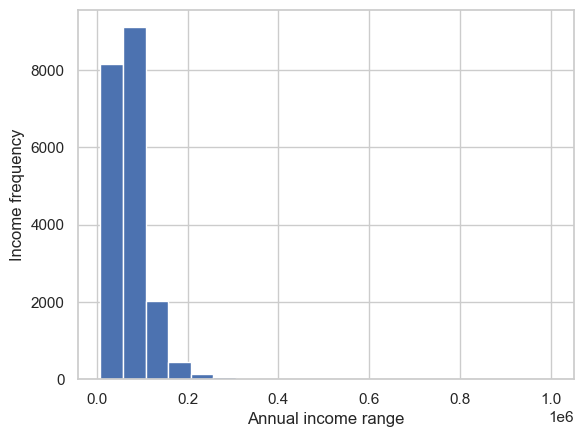

In [24]:

data["annual_inc"].hist(
    bins = 20)


plt.xlabel('Annual income range')
plt.ylabel('Income frequency')

plt.show()
    

In [25]:
data["annual_inc"].describe().round()

count      20000.0
mean       73350.0
std        45199.0
min         8412.0
25%        47000.0
50%        65000.0
75%        88000.0
max      1000000.0
Name: annual_inc, dtype: float64

- *Mean and median:*

In [26]:
data["annual_inc"].agg(["mean", "median"]).round()

mean      73350.0
median    65000.0
Name: annual_inc, dtype: float64

- *Min and max values:*

In [27]:
data["annual_inc"].agg(["max", "min"])

max    1000000.0
min       8412.0
Name: annual_inc, dtype: float64

- *Standard deviation:*

In [28]:
data["annual_inc"].std().round()

45199.0

The high standard deviation indicates that the annual incomes are widely spread out from the average income of approximately $73,350.00.

- *2% Quantile:*

In [29]:
data["annual_inc"].quantile(0.02)

25000.0

Approximately 2% of individuals have an annual income below USD 25,000. Therefore, 98% of individuals have an income higher than USD 25,000

- *95% Quantile:*

In [30]:
data["annual_inc"].quantile(0.95)

145000.0

Approx. 95% of individuals have an annual income below USD 145,000. Only 5% have a higher annual income than USD 145,000.

- *Skewness:*

In [31]:
import scipy
from scipy import stats
data["annual_inc"].skew()

5.276043835124063

With a positive skewness value of 5.28, the tail of the distribution is longer on the right side.
This shows that there are fewer individuals with extremely high annual incomes, but these high incomes contribute to a longer right tail of the distribution.
Since the distribution is positively skewed, there are relatively more individuals with annual incomes lower than the mean. This aligns with the observation that the mean annual income is higher than the median, indicating that the distribution is pulled to the right by the presence of these larger values. This correlates with the previous observation and the histogram presented.
Positive skewness is also sensitive to outliers, particularly the higher incomes in this case - these contribute to the longer right tail and influence the mean more than the median (which is less sensitive to outliers).


- *Kurtosis:*

In [32]:
data["annual_inc"].kurtosis()

66.74364275973429

With a positive kurtosis value of 66.7, it indicates extremely heavy tails and a very sharp peak compared to the normal distribution. This suggests that there are extreme values (both high and low) that occur more frequently. The distribution also has a very sharp peak, indicating that there is a high concentration of values around the mean. This implies that there is less variability in the data compared to a normal distribution, except for the presence of outliers contributing to the heavy tails.

- **grade(categorical and ordinal):**

In [33]:
data.grade.head()

0    A
1    A
2    D
3    D
4    D
Name: grade, dtype: object

In [34]:
data["grade"].describe()

count     20000
unique        7
top           B
freq       6042
Name: grade, dtype: object

- *List of unique values:*

In [35]:
data["grade"].unique().tolist()

['A', 'D', 'E', 'B', 'G', 'C', 'F']

In [36]:
data["grade"].nunique()

7

There are 7 different unique values for grades - A, B, C, D, E, F, G.

- *Mode of the variable:*

In [37]:
data["grade"].mode()

0    B
Name: grade, dtype: object

- *Count of each value:*

In [38]:
data["grade"].value_counts().sort_values(ascending = False)

grade
B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: count, dtype: int64

- *Proportion (%) of the highest uniques:*

In [39]:
data["grade"].value_counts(normalize=True)*100

grade
B    30.210
C    27.830
D    17.770
A    10.795
E     8.225
F     4.325
G     0.845
Name: proportion, dtype: float64

Most common grade is B, with 30% of proportion.

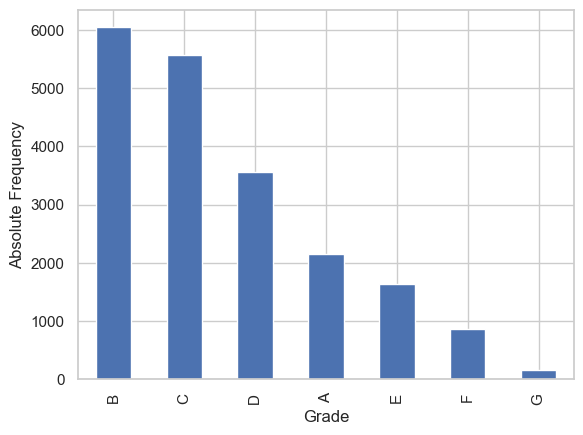

In [40]:
data["grade"].value_counts().plot.bar()

plt.xlabel('Grade')
plt.ylabel('Absolute Frequency')
plt.show()

# 4. Correlation Analysis

**4.1 Correlation between features (Spearman)**

In [41]:
from scipy.stats import pearsonr, spearmanr

*Convert to numeric to evaluate the correlation:*

In [42]:
corr_spearman = numeric_features.corr(method = 'spearman')
corr_spearman

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.018938,0.015269,0.002137,0.007920,-0.030892,-0.055555,-0.029767,-0.008626,0.001626,-0.043422
annual_inc,0.018938,1.000000,-0.137179,0.178792,-0.223426,-0.101568,-0.005192,0.062358,-0.014494,-0.001808,-0.130561
short_emp,0.015269,-0.137179,1.000000,-0.557925,0.000696,0.030880,0.072290,-0.013689,0.008941,-0.005235,0.037186
emp_length_num,0.002137,0.178792,-0.557925,1.000000,0.011083,-0.055780,-0.160225,0.045735,-0.014561,0.004869,-0.041795
dti,0.007920,-0.223426,0.000696,0.011083,1.000000,0.031520,0.008652,0.176115,0.015716,0.005388,0.140378
last_delinq_none,-0.030892,-0.101568,0.030880,-0.055780,0.031520,1.000000,0.603267,0.021821,-0.012467,-0.001977,0.021494
last_major_derog_none,-0.055555,-0.005192,0.072290,-0.160225,0.008652,0.603267,1.000000,-0.025342,-0.051227,0.050634,-0.013770
revol_util,-0.029767,0.062358,-0.013689,0.045735,0.176115,0.021821,-0.025342,1.000000,0.007963,-0.002848,0.099935
total_rec_late_fee,-0.008626,-0.014494,0.008941,-0.014561,0.015716,-0.012467,-0.051227,0.007963,1.000000,-0.001653,0.141406
od_ratio,0.001626,-0.001808,-0.005235,0.004869,0.005388,-0.001977,0.050634,-0.002848,-0.001653,1.000000,0.000408


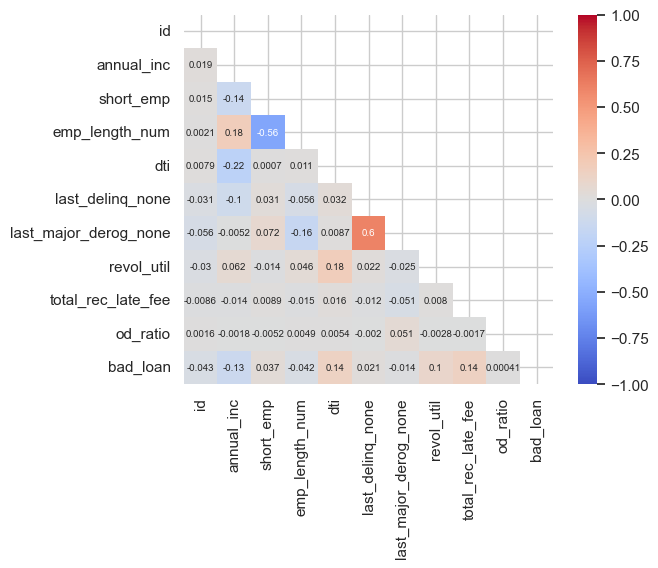

In [43]:

sns.heatmap(
    corr_spearman,
    vmin = -1.,
    vmax = 1., 
    annot=True,
    cmap = 'coolwarm',
    square = True,
    mask = np.triu(np.ones_like(corr_spearman)),
    annot_kws={"fontsize": 7}
);

*Test without the chart:*

In [44]:
# remove values that are equal to 1 (e.g. correlation of annual_inc with annual_inc) as these create noise:
corr_spearman_no_self = corr_spearman[corr_spearman != 1]
corr_spearman_no_self

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,NaN,0.018938,0.015269,0.002137,0.007920,-0.030892,-0.055555,-0.029767,-0.008626,0.001626,-0.043422
annual_inc,0.018938,NaN,-0.137179,0.178792,-0.223426,-0.101568,-0.005192,0.062358,-0.014494,-0.001808,-0.130561
short_emp,0.015269,-0.137179,NaN,-0.557925,0.000696,0.030880,0.072290,-0.013689,0.008941,-0.005235,0.037186
emp_length_num,0.002137,0.178792,-0.557925,NaN,0.011083,-0.055780,-0.160225,0.045735,-0.014561,0.004869,-0.041795
dti,0.007920,-0.223426,0.000696,0.011083,NaN,0.031520,0.008652,0.176115,0.015716,0.005388,0.140378
last_delinq_none,-0.030892,-0.101568,0.030880,-0.055780,0.031520,NaN,0.603267,0.021821,-0.012467,-0.001977,0.021494
last_major_derog_none,-0.055555,-0.005192,0.072290,-0.160225,0.008652,0.603267,NaN,-0.025342,-0.051227,0.050634,-0.013770
revol_util,-0.029767,0.062358,-0.013689,0.045735,0.176115,0.021821,-0.025342,NaN,0.007963,-0.002848,0.099935
total_rec_late_fee,-0.008626,-0.014494,0.008941,-0.014561,0.015716,-0.012467,-0.051227,0.007963,NaN,-0.001653,0.141406
od_ratio,0.001626,-0.001808,-0.005235,0.004869,0.005388,-0.001977,0.050634,-0.002848,-0.001653,NaN,0.000408


**FEATURES WITH MOST POSITIVE CORRELATION:**

In [45]:
most_corr_positive = corr_spearman_no_self.unstack().idxmax()
most_corr_positive

('last_delinq_none', 'last_major_derog_none')

In [46]:
data[["last_delinq_none", "last_major_derog_none"]].corr(method = 'spearman')

# USING THIS METHOD AS spearmanr(data["last_delinq_none"], data["last_major_derog_none"]) DOES NOT HANDLE MISSING VALUES WHICH ARE PRESENT IN last_major_derog_none 

,last_delinq_none,last_major_derog_none
last_delinq_none,1.000000,0.603267
last_major_derog_none,0.603267,1.000000


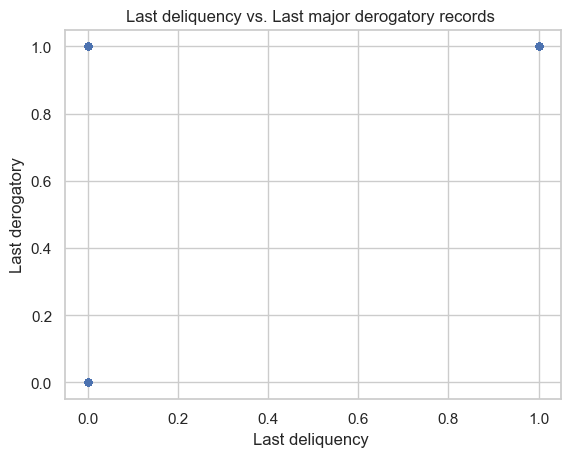

In [47]:
data.plot.scatter(
    x = "last_delinq_none",
    y = "last_major_derog_none"
)


plt.xlabel("Last deliquency ")
plt.ylabel("Last derogatory")

plt.title("Last deliquency vs. Last major derogatory records ")



plt.show()

**FEATURES WITH MOST NEGATIVE CORRELATION:**

In [48]:
most_corr_negative = corr_spearman_no_self.unstack().idxmin()
most_corr_negative

('short_emp', 'emp_length_num')

In [49]:
spearmanr(data["short_emp"], data["emp_length_num"])

SignificanceResult(statistic=-0.5579248072588023, pvalue=0.0)

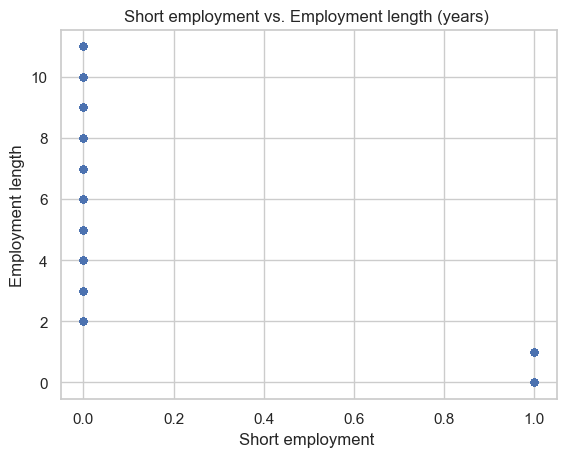

In [50]:
data.plot.scatter(
    x = "short_emp",
    y = "emp_length_num"
)


plt.xlabel("Short employment ")
plt.ylabel("Employment length")

plt.title("Short employment vs. Employment length (years) ")



plt.show()

**ANSWER:** 
- The most correlated features are **last_delinq_none** and **last_major_derog_none**, with correlation of **0.603**. This can be explained by the fact that individuals who have had no recent delinquencies may also have had no major derogatory records, leading to a positive correlation between the two variables. The scatter plot is explained by the fact that these features are binary, so the only combinations are (1,1), (1,0) and (0,0).

- The features with the second highest correlation (and negative one) are **emp_length_num** and **short_emp**, with correlation of **-0.558**. Individuals with longer employment lengths (higher values of "emp_length_num") may be less likely to be classified as having short employment ("short_emp" = 1), leading to a negative correlation with "emp_length_num". 


**4.2. Correlation of features with target (Pearson)**  

In [51]:
corr_pearson = numeric_features.corr(method = 'pearson')
corr_pearson

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


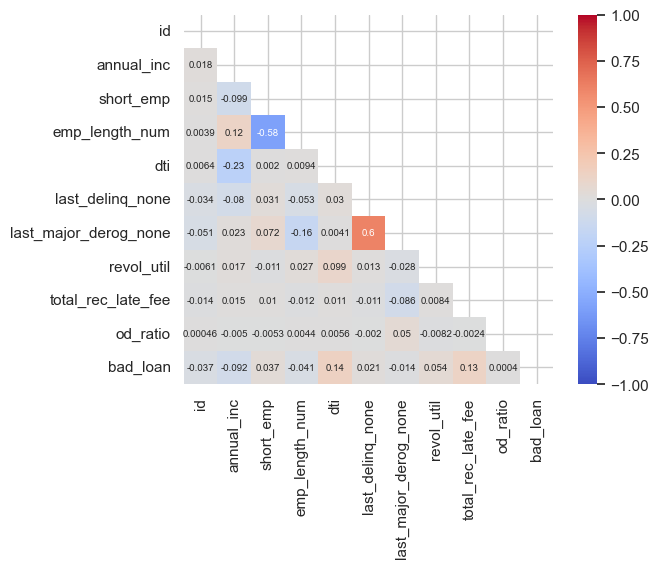

In [52]:

sns.heatmap(
    corr_pearson,
    vmin = -1., 
    vmax = 1.,
    cmap = 'coolwarm',
    annot = True,
    square = True, 
    mask=np.triu(corr_pearson.notnull()),
    annot_kws={"fontsize": 7}
);
    

In [53]:
corr_with_target = corr_pearson["bad_loan"].sort_values(ascending = False)
corr_with_target

bad_loan                 1.000000
dti                      0.141884
total_rec_late_fee       0.130233
revol_util               0.053682
short_emp                0.037186
last_delinq_none         0.021494
od_ratio                 0.000403
last_major_derog_none   -0.013770
id                      -0.037307
emp_length_num          -0.041420
annual_inc              -0.092402
Name: bad_loan, dtype: float64

**ANSWER:** 
The highest correlation between the **debt-to-income ratio ("dti")** and the **target variable "bad_loan"** of **0.14** suggests that individuals with higher debt-to-income ratios are more likely to default on loans. Higher debt-to-income ratios indicate a higher financial burden on borrowers, making them more vulnerable to default if faced with financial challenges. 

# 5. Outliers Analysis

In [54]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


Let's start by selecting numeric features (non binary): 

- annual_inc;
- emp_length_num;
- dti;
- revol_util;
- total_rec_late_fee;
- od_ratio.

*Scatter plot of features to see if the distributions are normal or not, and if there are any outliers present:*

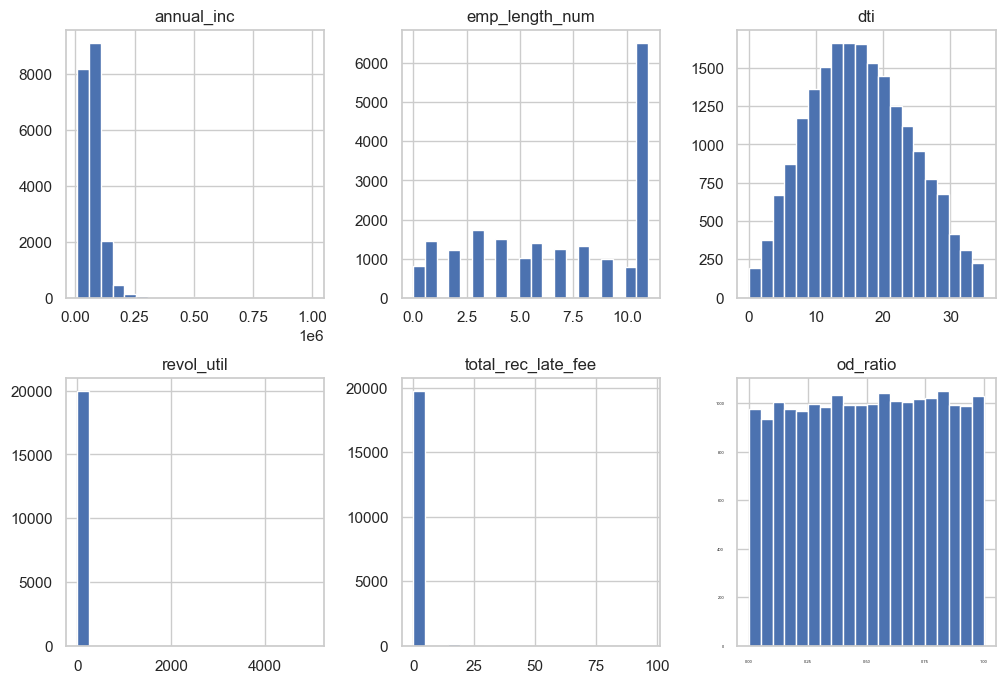

In [55]:
data[["annual_inc", "emp_length_num", "dti", "revol_util", "total_rec_late_fee", "od_ratio"]].hist(bins=20, layout=(2, 3), figsize=(12, 8))

plt.xticks(fontsize=3)
plt.yticks(fontsize=3)

plt.show()

We can already exclude features that show normal distribution and no visible outliers:
- *dti*;
- *od_ratio*;
- *emp_length_num*: although it shows a higher frequency for >10 years compared to the other values (0-9 years), it does not necessarily indicate the presence of outliers. It's common to have a higher frequency for certain values, such as 10 years, as it may represent a common milestone in employment tenure. To confirm, see the boxplot chart for "emp_length_num" below; no visible outliers are apparent.



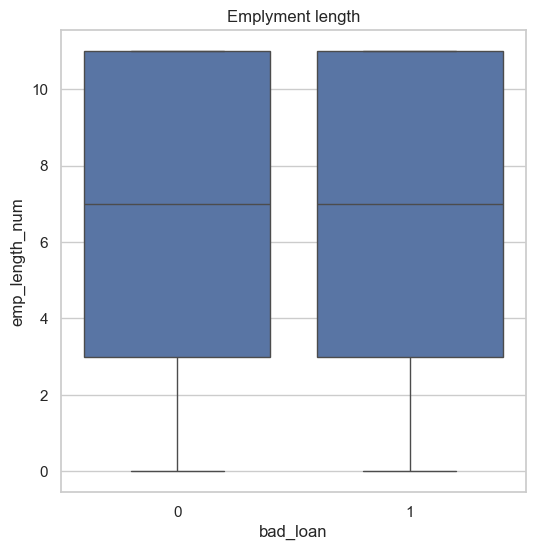

In [56]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "emp_length_num",
    data = data 
)

plt.title("Emplyment length")
plt.show()

As for the outliers, let's investigate *annual_inc*, *revol_util* and *total_rec_late_fee* which have clear outliers that are far beyond most of normal observations:

I will opt for Interquartile Range (IQR) method to handle these outliers -  this method calculates the range between the first and third quartiles of the data distribution, providing a robust measure of variability. By defining outlier boundaries based on this range, we can effectively identify and exclude extreme values, ensuring our analysis is focused on more representative data. This will help accommodate non-normal data distributions and provide a standardized means of outlier detection.

**OUTLIER 1: annual_inc**

In [57]:
data.annual_inc.describe()

count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64

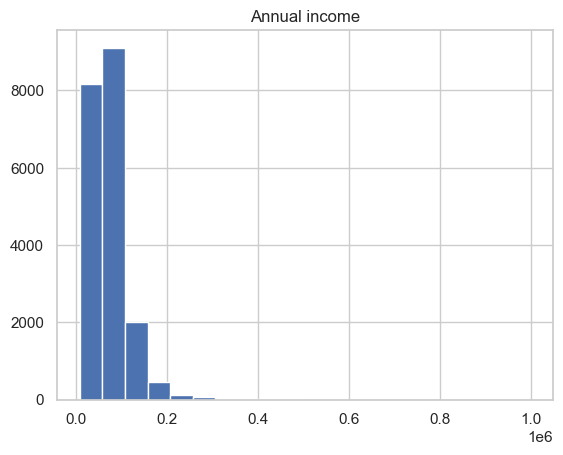

In [58]:
data["annual_inc"].hist(bins=20)
plt.title('Annual income')
plt.show()

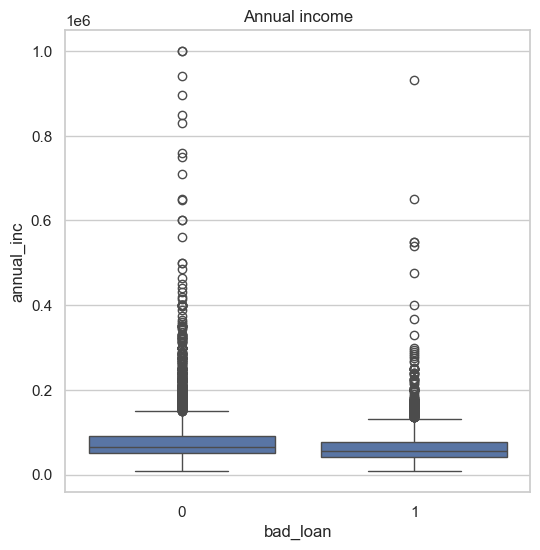

In [59]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "annual_inc",
    data = data 
)

plt.title("Annual income")
plt.show()

In [60]:
data.shape

(20000, 15)

In [61]:
Q1 = data["annual_inc"].quantile(0.25)
Q3 = data["annual_inc"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 *IQR

outliers_mask_annual_inc = data[(data["annual_inc"] < lower_bound) | (data["annual_inc"] > upper_bound)]
outliers_mask_annual_inc.shape


(926, 15)

There are 926 outliers.

In [62]:
data_no_outliers_annual_inc = data[(data["annual_inc"] >= lower_bound) & (data["annual_inc"] <= upper_bound)]
data_no_outliers_annual_inc.shape

(19074, 15)

Plot for data with no outliers (expected to resemble normal distribution now):

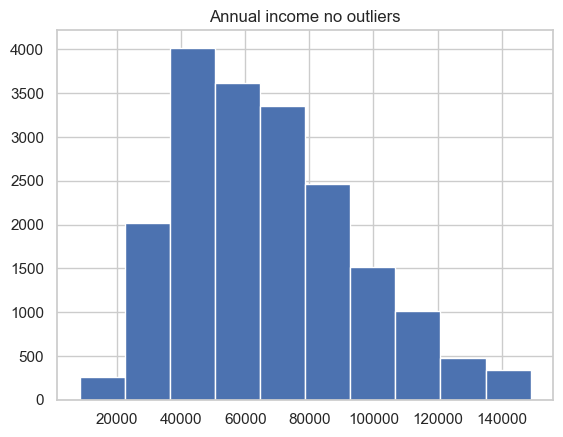

In [63]:
data_no_outliers_annual_inc["annual_inc"].hist()
plt.title('Annual income no outliers')
plt.show()

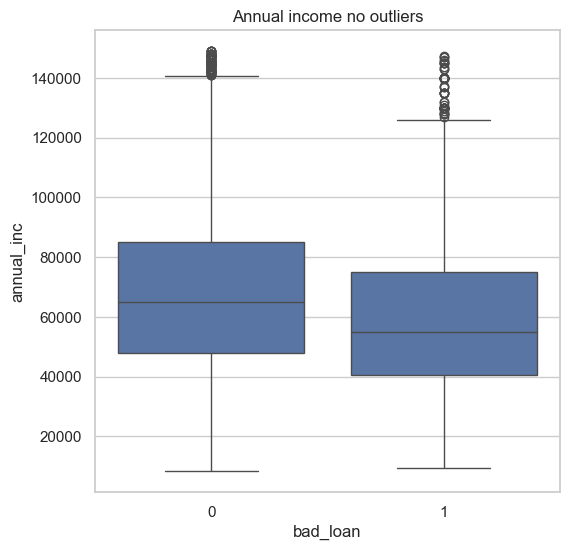

In [64]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "annual_inc",
    data = data_no_outliers_annual_inc 
)

plt.title("Annual income no outliers")
plt.show()

In this approach, a notable proportion of observations, approximately 5%, are identified as outliers. For instance, individuals with an annual income of $200,000 are also flagged as outliers. However, this outlier population exhibits distinct characteristics; for instance, applicants with higher incomes typically display lower debt-to-income ratios, resulting in lower interest rates and reduced risk levels.

**OUTLIERS 2: revol_util**

In [65]:
data_no_outliers_annual_inc.revol_util.describe()

count    19074.000000
mean        55.986228
std         42.751021
min          0.000000
25%         38.900000
50%         57.050000
75%         73.700000
max       5010.000000
Name: revol_util, dtype: float64

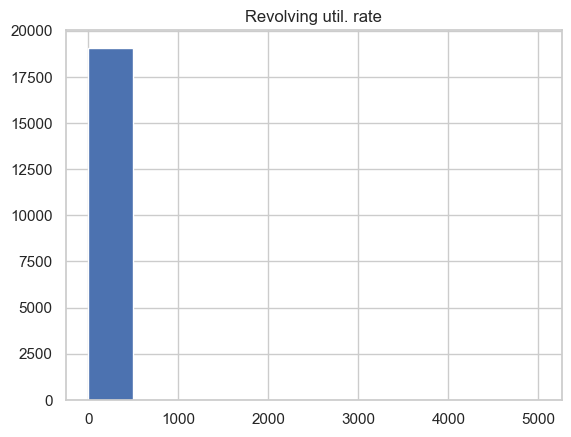

In [66]:
data_no_outliers_annual_inc["revol_util"].hist()
plt.title('Revolving util. rate')
plt.show()

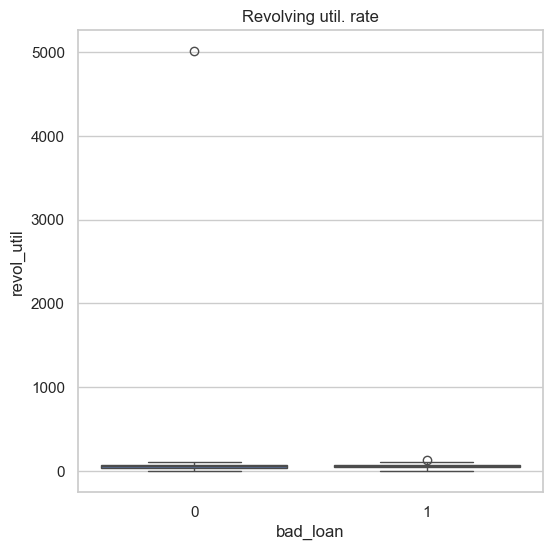

In [67]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "revol_util",
    data = data_no_outliers_annual_inc 
)

plt.title("Revolving util. rate")
plt.show()

In [68]:
data_no_outliers_annual_inc.shape

(19074, 15)

In [69]:
Q1_revol_util = data_no_outliers_annual_inc["revol_util"].quantile(0.25)
Q3_revol_util = data_no_outliers_annual_inc["revol_util"].quantile(0.75)
IQR_revol_util = Q3_revol_util - Q1_revol_util

lower_bound_revol_util = Q1_revol_util - 1.5 * IQR_revol_util
upper_bound_revol_util = Q3_revol_util + 1.5 * IQR_revol_util

outliers_mask_revol_util = data_no_outliers_annual_inc[(data_no_outliers_annual_inc["revol_util"] < lower_bound_revol_util) | (data_no_outliers_annual_inc["revol_util"] > upper_bound_revol_util)]
outliers_mask_revol_util.shape

(2, 15)

There are only 2 outliers.

In [70]:
data_no_outliers_inc_revol = data_no_outliers_annual_inc[(data_no_outliers_annual_inc["revol_util"] >= lower_bound_revol_util) & (data_no_outliers_annual_inc["revol_util"] <= upper_bound_revol_util)]
data_no_outliers_inc_revol.shape

(19072, 15)

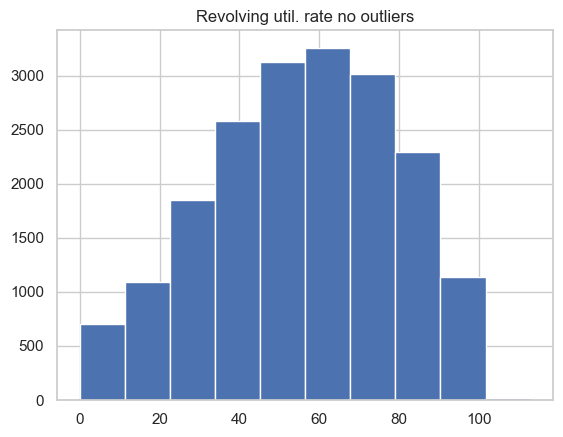

In [71]:
data_no_outliers_inc_revol.revol_util.hist()
plt.title('Revolving util. rate no outliers')
plt.show()

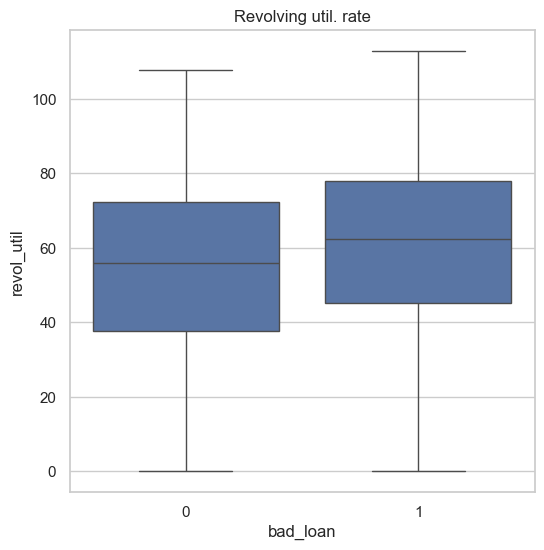

In [72]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "revol_util",
    data = data_no_outliers_inc_revol 
)

plt.title("Revolving util. rate")
plt.show()

We excluded two outliers characterized by excessively high revolving utilization rates, with one exceeding 5000. This decision aligns with our rationale to disregard applicants demonstrating exceptionally high revolving utilization rates, as such individuals may be more likely to default on their loans.

**OUTLIERS 3: total_rec_late_fee**

In [73]:
data_no_outliers_inc_revol.total_rec_late_fee.describe()

count    19072.000000
mean         0.284237
std          3.049310
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.466600
Name: total_rec_late_fee, dtype: float64

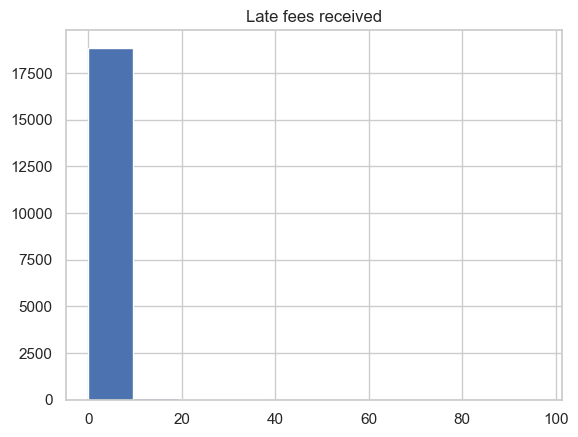

In [74]:
data_no_outliers_inc_revol.total_rec_late_fee.hist()
plt.title('Late fees received')
plt.show()

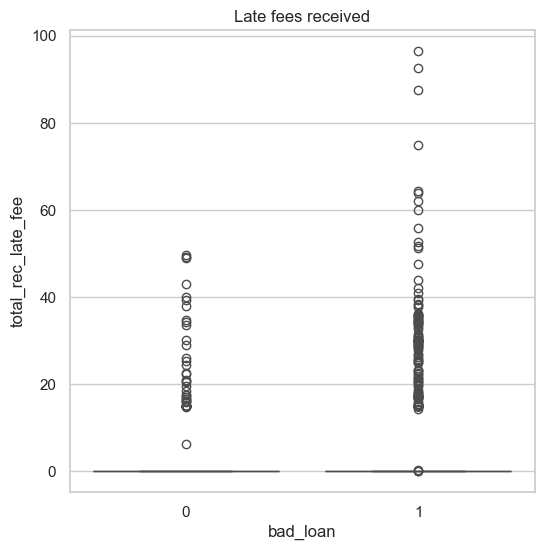

In [75]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "total_rec_late_fee",
    data = data_no_outliers_inc_revol 
)

plt.title("Late fees received")
plt.show()

In [76]:
Q1_late_fee = data_no_outliers_inc_revol["total_rec_late_fee"].quantile(0.25)
Q3_late_fee = data_no_outliers_inc_revol["total_rec_late_fee"].quantile(0.75)
IQR_late_fee = Q3_late_fee - Q1_late_fee

lower_bound_late_fee = Q1_late_fee - 1.5 * IQR_late_fee
upper_bound_late_fee = Q3_late_fee + 1.5 * IQR_late_fee

outliers_late_fee = data_no_outliers_inc_revol[(data_no_outliers_inc_revol["total_rec_late_fee"] < lower_bound_late_fee) | (data_no_outliers_inc_revol["total_rec_late_fee"] > upper_bound_late_fee)]
outliers_late_fee.shape


(219, 15)

There are 219 outliers.

In [77]:
data_no_outliers_inc_revol.shape

(19072, 15)

In [78]:
data_no_outliers = data_no_outliers_inc_revol[(data_no_outliers_inc_revol["total_rec_late_fee"] >= lower_bound_late_fee) & (data_no_outliers_inc_revol["total_rec_late_fee"] <= upper_bound_late_fee)]
data_no_outliers.shape

(18853, 15)

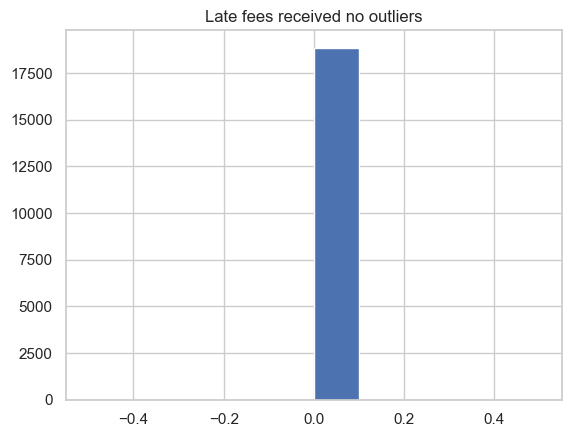

In [79]:
data_no_outliers.total_rec_late_fee.hist()
plt.title('Late fees received no outliers')
plt.show()

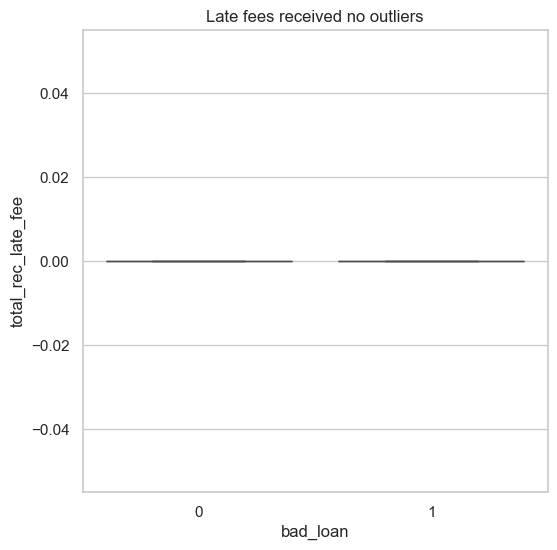

In [80]:
plt.figure(figsize = (6,6))

sns.boxplot(
    x = "bad_loan",
    y = "total_rec_late_fee",
    data = data_no_outliers 
)

plt.title("Late fees received no outliers")
plt.show()

Excluding outliers from the "total_rec_late_fee" feature helps refine our dataset by removing instances of exceptionally high late fees. This action ensures that our analysis focuses on applicants with a more reliable repayment history, enhancing our ability to identify trustworthy borrowers. Consequently, by prioritizing individuals with lower late fees, we mitigate the risk of default and improve the overall quality of portfolio.

# 6. Missing Values and Anomalies

**"term" anomaly:**

In [81]:
data_no_outliers.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1414
dti                        140
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    18305
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [82]:
data_no_outliers.term.unique()

array([' 36 months', ' 60 months', ' 36 Months'], dtype=object)

It seems like there are inconsistencies in the representation of the "term" feature values. Specifically, there are variations in the capitalization of the term duration (e.g., '36 months' and '36 Months'). I will convert all values to lowercase to ensure consistency:

In [83]:
data_no_outliers.loc[:, 'term'] = data_no_outliers['term'].str.lower()
data_no_outliers['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

**Missing values:**

- **home_ownership**

<Axes: xlabel='home_ownership', ylabel='count'>

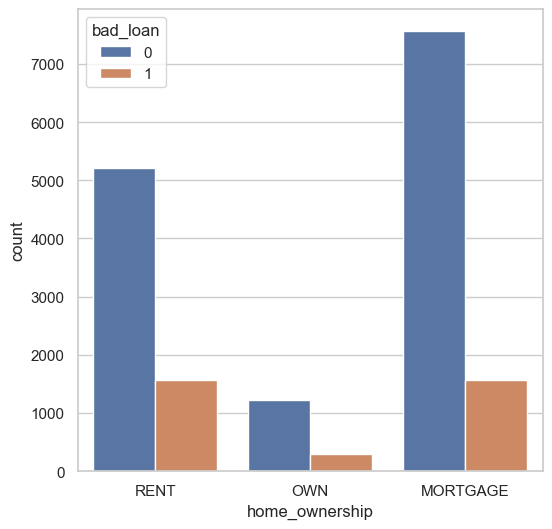

In [84]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'home_ownership', hue = 'bad_loan', data = data_no_outliers)

In [85]:
data_no_outliers.home_ownership.isnull().sum()

1414

In [86]:
data_no_outliers.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', nan], dtype=object)

In [87]:
data_no_outliers.home_ownership.mode()

0    MORTGAGE
Name: home_ownership, dtype: object

There are 1414 missing values in home_ownership feature: the reason could be due to various factors such as data entry errors, incomplete data collection processes, or intentional omissions. 

Imputing missing values with "unknown" allows us to retain the information that data is missing without making any assumptions about the borrowers' home ownership status. This approach maintains transparency in the preprocessing steps and ensures that the missingness is accounted for in following analyses. 

Additionally, using this method prevents potential biases that could arise from imputing with the mode (most frequent category), which may inaccurately represent the true distribution of home ownership statuses in the dataset. The distinct categories of home ownership, such as loan vs. mortgage, can have a significant impact on the final loan decision, and by retaining these categories, we ensure that the model captures the nuances of borrower profiles accurately. This is particularly important in mitigating false negatives, where the model fails to identify risky loans that should have been flagged as such. By considering all relevant factors, including missing data, the model can better assess the risk associated with different home ownership situations and reduce the likelihood of false negatives.

In [88]:
data_clean = data_no_outliers.copy()

data_clean.loc[:, 'home_ownership'] = data_clean['home_ownership'].fillna('unknown')
#adding loc function due to a pandas warning

In [89]:
data_clean.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'unknown'], dtype=object)

In [90]:
data_clean.home_ownership.isnull().sum()

0

- **dti**

In [91]:
data_clean.dti.isnull().sum()

140

There are 140 missing values in the DTI (debt-to-income) variable and it could be due to various reasons, such as data recording errors, incomplete data entry, or the absence of certain financial information for specific applicants.
Dropping rows with missing DTI values might not be the best approach, especially if those rows contain valuable information for other variables.

Instead, we will imput the missing values with median, as it provides a more robust estimate of central tendency (although the feature shows a symmetric normal distribution).

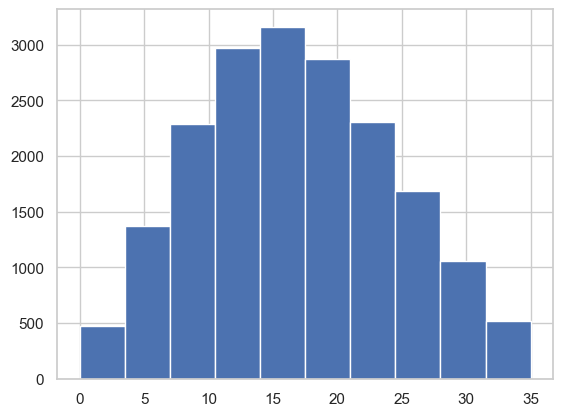

In [92]:
data_clean.dti.hist()
plt.show()

In [93]:
data_clean.dti.median()

16.47

In [94]:
data_clean1 = data_clean.copy()
dti_median = data_clean1['dti'].median()

data_clean1.loc[data_clean1['dti'].isnull(), 'dti'] = dti_median


In [95]:
data_clean1.dti.isnull().sum()

0

- **last_major_derog_none:**

In [96]:
data_clean1.last_major_derog_none.isnull().sum()

18305

In [97]:
data_clean1.shape

(18853, 15)

In [98]:
data_full_clean = data_clean1.copy()
data_full_clean.drop(columns=['last_major_derog_none'], inplace=True)


We dropped the column "last_major_derog_none" because it had a high percentage (97%) of null values, making it unreliable for analysis. However, this removal doesn't significantly impact the dataset because "last_major_derog_none" had the highest Spearman correlation with "last_delinq_none" at 0.603. Since these two features were highly correlated, dropping "last_major_derog_none" doesn't result in a major loss of information for the dataset.

In [99]:
data_full_clean.isnull().sum()

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

# 7. Feature Selection

**NUMERICAL FEATURES:**

In [100]:
data_full_clean.dtypes

id                      int64
grade                  object
annual_inc            float64
short_emp               int64
emp_length_num          int64
home_ownership         object
dti                   float64
purpose                object
term                   object
last_delinq_none        int64
revol_util            float64
total_rec_late_fee    float64
od_ratio              float64
bad_loan                int64
dtype: object

In [101]:
numeric_mask1 = data_full_clean.select_dtypes(include='number').columns
numeric_features1 = data_full_clean[numeric_mask1]

**1. Variance Threshold:**

In [102]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold=0.05)
var_th.fit_transform(numeric_features1)

array([[1.14546410e+07, 1.00000000e+05, 1.00000000e+00, ...,
        4.32000000e+01, 1.60624077e-01, 0.00000000e+00],
       [9.60487400e+06, 8.30000000e+04, 0.00000000e+00, ...,
        2.15000000e+01, 8.10776768e-01, 0.00000000e+00],
       [9.68470000e+06, 7.80000000e+04, 0.00000000e+00, ...,
        4.63000000e+01, 3.51471746e-02, 1.00000000e+00],
       ...,
       [1.57633100e+06, 4.50000000e+04, 0.00000000e+00, ...,
        4.62000000e+01, 6.52199869e-01, 0.00000000e+00],
       [6.64573600e+06, 1.04000000e+05, 0.00000000e+00, ...,
        7.85000000e+01, 4.82554646e-01, 0.00000000e+00],
       [6.62573600e+06, 3.84000000e+04, 0.00000000e+00, ...,
        4.74000000e+01, 8.22980066e-01, 0.00000000e+00]])

In [103]:
numeric_features1.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000.0,1,1,26.27,1,43.2,0.0,0.160624,0
1,9604874,83000.0,0,4,5.39,0,21.5,0.0,0.810777,0
2,9684700,78000.0,0,11,18.45,1,46.3,0.0,0.035147,1
3,9695736,37536.0,0,6,12.28,0,10.7,0.0,0.534887,1
4,9795013,65000.0,0,11,11.26,0,15.2,0.0,0.166500,0


In [104]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

Based on the variance threshold that is 0.05 we can conclude that only feature total_rec_late_fee will be excluded.

**2. Pearson Correlation:**

In [105]:
X_num = numeric_features1.drop(columns = ["bad_loan"]) #features set
y_num = numeric_features1["bad_loan"] #target 

In [106]:
X_num.head(2)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
0,11454641,100000.0,1,1,26.27,1,43.2,0.0,0.160624
1,9604874,83000.0,0,4,5.39,0,21.5,0.0,0.810777


In [107]:
y_num.head(2)

0    0
1    0
Name: bad_loan, dtype: int64

In [108]:
import scipy
import numpy as np

print("col                    corr  pval")
for col in X_num.columns:
    corr = np.nan  
    pval = np.nan  
    if X_num[col].nunique() > 1:  # Check if column has more than one unique value (adjusting the code due to null values in total_rec_late_fee)
        corr, pval = scipy.stats.pearsonr(X_num[col], y_num)
    
    print(f"{col: <20}  {corr: >5.2f}  {pval:4.2f}")

col                    corr  pval
id                    -0.04  0.00
annual_inc            -0.12  0.00
short_emp              0.04  0.00
emp_length_num        -0.04  0.00
dti                    0.14  0.00
last_delinq_none       0.02  0.00
revol_util             0.10  0.00
total_rec_late_fee      nan   nan
od_ratio               0.00  0.90


- *id*: bad correlation, low p-value (<0.05), so we can trust correlation
- *annual_inc*: good negative correlation, low p-value (<0.05), so we can trust correlation
- *short_emp*: bad correlation, low p-value (<0.05), so we can trust correlation
- *emp_length_num*: bad negative correlation, low p-value (<0.05), so we can trust correlation
- *dti*: good correlation, low p-value (<0.05), so we can trust correlation
- *last_delinq_none*: bad correlation, low p-value (<0.05), so we can trust correlation
- *revol_util*: good correlation, low p-value (<0.05), so we can trust correlation
- *total_rec_late_fee*: no correlation as the values are null (most of the values present before were the outliers, which were removed)
- *od_ratio*: null correlation but p-value is too high (>0.05) - we do not have a enough statistical significance in our observations to conclude this. Can be due to chance.

**3. Mutual Information:**

In [109]:
X_num.total_rec_late_fee.max()

0.0

In [110]:
from sklearn.feature_selection import mutual_info_regression
list(zip(X_num.columns, mutual_info_regression(X_num, y_num, random_state=123, n_neighbors=3)))

[('id', 0.0),
 ('annual_inc', 0.014553578840356352),
 ('short_emp', 0.0),
 ('emp_length_num', 0.0019605097368700086),
 ('dti', 0.012369227048228737),
 ('last_delinq_none', 0.009544478973537274),
 ('revol_util', 0.007047988750626288),
 ('total_rec_late_fee', 0.0),
 ('od_ratio', 0.0026440125401325787)]

Based on the 3 approaches (Variance Threshold, Pearson and Mutual Information), I would drop features:
- **"id"** : bad correlation, p-value is low so we can trust that correlation; MI shows 0
- **"short_emp"** : bad correlation, p-value is low so we can trust that correlation; MI shows 0
- **"total_rec_late_fee"** : no correlation as it's mostly null and low variance threshold.

**CATEGORICAL FEATURES:**

In [111]:
categorical_features1 = data_full_clean[["grade", "home_ownership", "purpose", "term", "bad_loan"]]
categorical_features1


,grade,home_ownership,purpose,term,bad_loan
0,A,RENT,credit_card,36 months,0
1,A,OWN,credit_card,36 months,0
2,D,MORTGAGE,debt_consolidation,60 months,1
3,D,MORTGAGE,medical,60 months,1
4,D,MORTGAGE,debt_consolidation,36 months,0
...,...,...,...,...,...
19994,E,MORTGAGE,debt_consolidation,60 months,0
19995,B,RENT,debt_consolidation,36 months,1
19996,B,MORTGAGE,major_purchase,36 months,0
19997,B,MORTGAGE,debt_consolidation,36 months,0


In [112]:
X_cat = categorical_features1.drop(columns = ["bad_loan"])
y_cat = categorical_features1["bad_loan"]

In [113]:
X_cat.head(2)

,grade,home_ownership,purpose,term
0,A,RENT,credit_card,36 months
1,A,OWN,credit_card,36 months


In [114]:
y_cat.head(2)

0    0
1    0
Name: bad_loan, dtype: int64

**Chi-Square Test:**

In [115]:
pd.crosstab(X_cat["grade"], y_cat)

bad_loan,0,1
grade,,
A,1867,112
B,5049,714
C,4187,1095
D,2431,916
E,1034,492
F,487,321
G,90,58


In [116]:
scipy.stats.chi2_contingency(pd.crosstab(X_cat["grade"], y_cat))

Chi2ContingencyResult(statistic=962.5777434072022, pvalue=1.1078607379220615e-204, dof=6, expected_freq=array([[1589.77112396,  389.22887604],
       [4629.53561767, 1133.46438233],
       [4243.13849255, 1038.86150745],
       [2688.71346735,  658.28653265],
       [1225.86697077,  300.13302923],
       [ 649.08290458,  158.91709542],
       [ 118.89142312,   29.10857688]]))

In [117]:
pd.crosstab(X_cat["home_ownership"], y_cat)

bad_loan,0,1
home_ownership,,
MORTGAGE,7567,1568
OWN,1228,298
RENT,5204,1574
unknown,1146,268


In [118]:
scipy.stats.chi2_contingency(pd.crosstab(X_cat["home_ownership"], y_cat))

Chi2ContingencyResult(statistic=90.89794637060407, pvalue=1.4050125524324686e-19, dof=3, expected_freq=array([[7338.33209569, 1796.66790431],
       [1225.86697077,  300.13302923],
       [5444.90585053, 1333.09414947],
       [1135.89508301,  278.10491699]]))

In [119]:
pd.crosstab(X_cat["purpose"], y_cat)

bad_loan,0,1
purpose,,
car,133,29
credit_card,3279,656
debt_consolidation,9423,2312
home_improvement,777,185
house,73,12
major_purchase,265,81
medical,120,35
moving,83,27
other,705,252


In [120]:
scipy.stats.chi2_contingency(pd.crosstab(X_cat["purpose"], y_cat))

Chi2ContingencyResult(statistic=89.52137908907206, pvalue=2.068859127820068e-14, dof=11, expected_freq=array([[ 130.13790909,   31.86209091],
       [3161.06587811,  773.93412189],
       [9426.96520448, 2308.03479552],
       [ 772.79425025,  189.20574975],
       [  68.28223625,   16.71776375],
       [ 277.94886755,   68.05113245],
       [ 124.5146661 ,   30.4853339 ],
       [  88.36524691,   21.63475309],
       [ 768.77764812,  188.22235188],
       [ 179.1404551 ,   43.8595449 ],
       [  84.34864478,   20.65135522],
       [  62.65899326,   15.34100674]]))

In [121]:
pd.crosstab(X_cat["term"], y_cat)

bad_loan,0,1
term,,
36 months,11827,2353
60 months,3318,1355


In [122]:
scipy.stats.chi2_contingency(pd.crosstab(X_cat["term"], y_cat))

Chi2ContingencyResult(statistic=341.40498566866324, pvalue=3.1542168686998803e-76, dof=1, expected_freq=array([[11391.08364716,  2788.91635284],
       [ 3753.91635284,   919.08364716]]))

In [123]:
for col in X_cat.columns:
    table = pd.crosstab(X_cat[col], y_cat)
    print('\n', table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print('Feature:', col, '| p-value:', pval)



 bad_loan     0     1
grade               
A         1867   112
B         5049   714
C         4187  1095
D         2431   916
E         1034   492
F          487   321
G           90    58
Feature: grade | p-value: 1.1078607379220615e-204

 bad_loan           0     1
home_ownership            
MORTGAGE        7567  1568
OWN             1228   298
RENT            5204  1574
unknown         1146   268
Feature: home_ownership | p-value: 1.4050125524324686e-19

 bad_loan               0     1
purpose                       
car                  133    29
credit_card         3279   656
debt_consolidation  9423  2312
home_improvement     777   185
house                 73    12
major_purchase       265    81
medical              120    35
moving                83    27
other                705   252
small_business       146    77
vacation              82    23
wedding               59    19
Feature: purpose | p-value: 2.068859127820068e-14

 bad_loan       0     1
term                  
36 

In [124]:
data_clean.purpose.value_counts()

purpose
debt_consolidation    11735
credit_card            3935
home_improvement        962
other                   957
major_purchase          346
small_business          223
car                     162
medical                 155
moving                  110
vacation                105
house                    85
wedding                  78
Name: count, dtype: int64

The feature "purpose" seems to have the highest p-value (lowest statistical significance and no evidence enough to reject null hypothesis) and the observed counts test don't deviate much from the expected counts generated by Chi-Square test, suggesting that the variables are likely independent. 

Removing the "purpose" feature could simplify the model and reduce the risk of overfitting, especially considering its weaker association with the target variable compared to other features. By eliminating purpose, which has numerous categories, we can streamline the analysis process and focus on more influential predictors, potentially leading to a more accurate .


# 8. Pipelines Creation

Let's create a pipeline with three steps: 
- (1) SimpleImputer with strategy=’median’;
- (2) One Scaler you may know;
- (3) Principal Component Analysis (with final 5 features)


**8.1 Create a pipeline with three steps:**

In [125]:
data1 = pd.read_csv('final_project_lending.csv', low_memory=False)

In [126]:
data1.head(2)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0


In [127]:
data1_numeric_mask = data1.select_dtypes(include = 'number').columns
data1_numeric = data1[data1_numeric_mask]
data1_numeric.head(2)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,0
1,9604874,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,0


In [128]:
X = data1_numeric.drop(columns = ["bad_loan"])
y = data1_numeric["bad_loan"]

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [130]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Step 1
    ('scaler', StandardScaler()), # Step 2
    ('pca', PCA(n_components=5)), # Step 3
])

In [131]:
my_pipeline.steps

[('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler()),
 ('pca', PCA(n_components=5))]

**8.2: Fit and transform**

In [132]:
my_pipeline.fit(X,y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=5))])

In [133]:
my_pipeline.transform(X)

array([[-2.99311654, -0.32475257,  0.56241147, -0.46705904,  2.21261135],
       [ 0.06481438, -1.77644949,  0.44914407, -1.27086544, -0.26654187],
       [ 0.84529586,  0.41525528, -0.23537307, -0.18293477,  1.56744391],
       ...,
       [ 0.03099307, -0.26039133, -0.88427736,  0.6728927 ,  0.16759316],
       [-0.64481853, -0.33319441,  0.32925404, -0.44201346, -1.16456761],
       [ 1.75549609, -2.3297003 , -0.23018432,  0.69223766,  0.32758831]])

In [134]:
X_transformed = my_pipeline.transform(X)

X_transformed = pd.DataFrame(
    X_transformed,
    columns=['F1', 'F2', 'F3', 'F4', 'F5']
)
X_transformed.head() 


,F1,F2,F3,F4,F5
0,-2.993117,-0.324753,0.562411,-0.467059,2.212611
1,0.064814,-1.776449,0.449144,-1.270865,-0.266542
2,0.845296,0.415255,-0.235373,-0.182935,1.567444
3,0.040692,-0.599586,0.746238,-1.374588,-0.005466
4,1.106194,-0.793805,0.695500,-0.837169,0.859134


In [135]:
X_transformed.isnull().sum()

F1    0
F2    0
F3    0
F4    0
F5    0
dtype: int64

In [136]:
X_transformed.shape

(20000, 5)

In [137]:
X_transformed.describe()

,F1,F2,F3,F4,F5
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,3.819167e-17,1.421085e-18,1.136868e-17,1.136868e-17,-5.684342e-17
std,1.280010e+00,1.113778e+00,1.042983e+00,1.011061e+00,1.002349e+00
min,-3.760239e+00,-1.288423e+01,-3.013546e+00,-2.162698e+00,-1.085332e+01
25%,-4.229460e-01,-6.636373e-01,-6.650397e-01,-4.971405e-01,-5.798594e-01
50%,2.999263e-01,5.251104e-02,-9.410975e-02,-4.504633e-02,5.969600e-03
75%,8.704474e-01,7.302706e-01,5.338292e-01,3.939999e-01,5.956814e-01
max,7.012825e+00,3.290107e+01,1.469007e+01,5.745880e+01,5.433523e+01


These principal components are derived from the original features but are linear combinations of them, capturing the most significant patterns of variance in the data. They are ordered by the amount of variance they explain, with F1 capturing the most variance and so on.

They represent a compressed representation of the original dataset, retaining the most important information while reducing dimensionality.

# 9. Create pipelines with transformers

**NUMERICAL DATA:**

**Transformer 1: Outliers**

**Pipeline 1: Outliers; Imputer (median); Scaler**

In [138]:
from sklearn.base import TransformerMixin

In [139]:
data2 = pd.read_csv('final_project_lending.csv', low_memory=False)

In [140]:
data2_numeric_mask = data2.select_dtypes(include = 'number').columns
data2_numeric = data2[data2_numeric_mask]
data2_numeric

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,0
1,9604874,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,0
2,9684700,78000.0,0,11,18.45,1,NaN,46.3,0.0,0.035147,1
3,9695736,37536.0,0,6,12.28,0,NaN,10.7,0.0,0.534887,1
4,9795013,65000.0,0,11,11.26,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,27000.0,0,9,18.36,1,NaN,46.5,0.0,0.821782,1
19996,1576331,45000.0,0,2,23.22,0,NaN,46.2,0.0,0.652200,0
19997,6645736,104000.0,0,5,13.27,1,NaN,78.5,0.0,0.482555,0
19998,6625736,38400.0,0,2,12.84,0,NaN,47.4,0.0,0.822980,0


In [141]:
X2= data2_numeric.drop(columns = ["bad_loan"])
y2 = data2_numeric["bad_loan"]

In [142]:
X2.isnull().sum()

id                           0
annual_inc                   0
short_emp                    0
emp_length_num               0
dti                        154
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
dtype: int64

In [143]:
class OutlierRemover(TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X2, y=None):
        return self

    def transform(self, X2):
        X2_outliers_removed = X2.copy()
        for feature in self.features:
            Q1_X2 = X2_outliers_removed[feature].quantile(0.25)
            Q3_X2 = X2_outliers_removed[feature].quantile(0.75)
            IQR = Q3_X2 - Q1_X2
            lower_bound_X2 = Q1_X2 - 1.5 * IQR
            upper_bound_X2 = Q3_X2 + 1.5 * IQR
            X2_outliers_removed = X2_outliers_removed[(X2_outliers_removed[feature] >= lower_bound_X2) & (X2_outliers_removed[feature] <= upper_bound_X2)]

        return X2_outliers_removed

In [144]:
outlier_features = ['annual_inc', 'revol_util', 'total_rec_late_fee']

pipeline = Pipeline([
    ('outlier_remover', OutlierRemover(features=outlier_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


In [145]:
X2_transformed = pipeline.fit_transform(X2)

X2_transformed = pd.DataFrame(X2_transformed, columns=X2.columns)
X2_transformed.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio
0,2.404497,1.217272,2.782154,-1.536728,1.258329,0.903870,0.08397,-0.538110,0.0,-1.194339
1,1.254222,0.593223,-0.359434,-0.743404,-1.525468,-1.106353,0.08397,-1.471901,0.0,1.064839
2,1.303862,0.409680,-0.359434,1.107686,0.215738,0.903870,0.08397,-0.404712,0.0,-1.630351
3,1.310725,-1.075703,-0.359434,-0.214521,-0.606868,-1.106353,0.08397,-1.936645,0.0,0.106165
4,1.372460,-0.067534,-0.359434,1.107686,-0.742858,-1.106353,0.08397,-1.743002,0.0,-1.173920


In [146]:
X2_transformed.isnull().sum()

id                       0
annual_inc               0
short_emp                0
emp_length_num           0
dti                      0
last_delinq_none         0
last_major_derog_none    0
revol_util               0
total_rec_late_fee       0
od_ratio                 0
dtype: int64

In [147]:
X2.shape

(20000, 10)

In [148]:
X2_transformed.shape

(18853, 10)

In [149]:
X2_transformed.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio
count,1.885300e+04,1.885300e+04,1.885300e+04,1.885300e+04,1.885300e+04,1.885300e+04,1.885300e+04,1.885300e+04,18853.0,1.885300e+04
mean,-2.532672e-16,1.741212e-16,2.826643e-17,7.368117e-17,-2.185937e-16,-9.799030e-18,1.147617e-16,6.633189e-17,0.0,-1.104275e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,0.0,1.000027e+00
min,-4.354125e+00,-2.144808e+00,-3.594338e-01,-1.801169e+00,-2.244082e+00,-1.106353e+00,-1.190906e+01,-2.397086e+00,0.0,-1.752216e+00
25%,-8.596326e-01,-7.650001e-01,-3.594338e-01,-1.007845e+00,-7.495247e-01,-1.106353e+00,8.396967e-02,-7.231472e-01,0.0,-8.581192e-01
50%,-1.306708e-01,-1.776602e-01,-3.594338e-01,4.992027e-02,-4.824246e-02,9.038703e-01,8.396967e-02,5.572905e-02,0.0,6.602453e-03
75%,7.324236e-01,6.299322e-01,-3.594338e-01,1.107686e+00,7.170351e-01,9.038703e-01,8.396967e-02,7.743607e-01,0.0,8.666568e-01
max,2.404497e+00,3.016001e+00,2.782154e+00,1.107686e+00,2.420911e+00,9.038703e-01,8.396967e-02,2.461209e+00,0.0,1.721990e+00


**CATEGORICAL DATA:**

**Transformer 2: Filling missing values of categorical data (home_ownership)**

**Pipeline 2: Missing values; OHE and Ordinal encoding**

In [150]:
data3 = pd.read_csv('final_project_lending.csv', low_memory=False)

In [151]:
data3_categorical_mask = data3.select_dtypes(include = 'object').columns
data3_categorical = data3[data3_categorical_mask]
data3_categorical

,grade,home_ownership,purpose,term
0,A,RENT,credit_card,36 months
1,A,OWN,credit_card,36 months
2,D,MORTGAGE,debt_consolidation,60 months
3,D,MORTGAGE,medical,60 months
4,D,MORTGAGE,debt_consolidation,36 months
...,...,...,...,...
19995,B,RENT,debt_consolidation,36 months
19996,B,MORTGAGE,major_purchase,36 months
19997,B,MORTGAGE,debt_consolidation,36 months
19998,A,MORTGAGE,debt_consolidation,36 months


In [152]:
data3_categorical.isnull().sum()

grade                0
home_ownership    1491
purpose              0
term                 0
dtype: int64

In [153]:
data3_categorical.term.unique()

array([' 36 months', ' 60 months', ' 36 Months'], dtype=object)

In [154]:
data3_categorical.loc[:, 'term'] = data3_categorical['term'].str.lower()
data3_categorical.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

(fixing the "term" anomaly beforehand)

In [155]:
data3_categorical.grade.unique()

array(['A', 'D', 'E', 'B', 'G', 'C', 'F'], dtype=object)

In [156]:
#Fill in missing values of home_ownership with "unknown" as we did before:

class MissingValueImputer(TransformerMixin):
    def __init__(self, feature, value = "uknown"):
        self.feature = feature
        self.value = value
        return
        #self is a reference to the current instance of a class

    def fit(self, data3_categorical, y=None):
        return self

    def transform(self, data3_categorical):
        data3_categorical_copy = data3_categorical.copy()
        data3_categorical_copy[self.feature] = data3_categorical_copy[self.feature].fillna(self.value)
        
        return data3_categorical_copy

In [157]:
class OrdinalTransf(TransformerMixin):
    def _init_(self, categories, value = "grade"):
        self.grade_categories = categories
        self.value = value
        self.enc = OrdinalEncoder(categories = self.grade_categories)
        
        return
        #self is a reference to the current instance of a class
    def fit(self, data3_categorical):
        return self
    def transform(self, data3_categorical):
        X_enc = self.enc.fit_transform(data3_categorical[[self.value]])
        data3_categorical[self.value] = pd.DataFrame(X_enc, columns=[self.value])
        
        return data3_categorical

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import OneHotEncoder as OHE
import pandas as pd

grade_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
ohe_features = [["home_ownership", "purpose", "term"]]

pipeline2 = Pipeline([
    ('missing_value_imputer', MissingValueImputer(feature="home_ownership")), #Missing values transformer for home_ownership
    ('ordinal_encoder', OrdinalEncoder(categories=[grade_categories]), ["grade"]), #OrdinalEncoder for grade feature by order (A, B, C..)
    ('ohe_encoder', OHE(cols=ohe_features)), #OHE Encoder for remaining features
])